###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2020 Adam Wickenheiser

# Accessing Thermodynamic Properties

This is the first in a series of lessons on using Python for undergraduate Thermodynamics.

Thermodynamics is the study of how energy is transferred between different forms of matter.  Engineers use Thermodynamics to design systems and processes that produce something useful - for example, electrical energy or heat - in the most efficient way possible.  Nuclear power plants, air conditioners, and your car's engine are all examples of thermodynamic processes that produce energy that we use in our everyday lives.

During the course of these lessons, we will study several *cumulative design examples*, each motivated by a specific need.  For example:

1. How do you design an efficient system for keeping your house at room temperature when the outdoor temperature fluctuates?
1. How do you efficiently convert the heat produced by burning fossil fuels into useable electricity and/or mechanical work?

Notice that in each scenario, we are interested in efficiency.  There are many designs capable of doing either task, but for the sake of the environment (and the almighty dollar), we want to reduce the amount of waste as much as possible.

The following figure shows a typical system studied in Thermodynamics:

<img src="https://github.com/AdaWick/CDS/blob/master/Thermodynamics/images/vapor%20cycle.png?raw=true" width="500">

Starting in the lower left corner, liquid water is pumped up to high pressure, where it can be boiled very efficiently.  The steam that is produced is used to drive a turbine (a series of fan blades) that can be used to make electricity.  The steam is condensed back to liquid water by cooling it using cold river water.  The liquid water is then pumped again, repeating the cycle.

It turns out that is is much easier to pump liquid water than steam, so more energy is produced by the turbine than used by the pump, thus producing net energy.  The heat needed to boil the water comes from burning fossil fuels, nuclear fission, or solar heating, just to name a few.

We will refer to this diagram many times throughout these lessons.  It shows in a very general setting how heat in and out can be transformed into work in and out.  Air conditioners, nuclear power plants, and car engines all have these features in common; only the details vary.

The first step to designing a thermodynamic system is to be able to determine how energy is stored in various substances, like gasoline, refrigerants, and pressurized steam, and what processes can best extract this energy.

## Learning objectives:

1. To be able to get and set thermodynamic properties of substances for use in design and analysis
1. To be able to plot property diagrams including phase change
1. To be able to plot a thermodynamic process on a property diagram including constant property contours

## Contents:

1. [Introduction to Cantera: Getting and Setting Thermodynamic Properties](#intro)
1. [Property Diagrams](#propdiag)
1. [Saturated Liquid-vapor Mixtures](#sat)
1. [Plotting a Thermodynamic Process on a Property Diagram](#plotprocess)
1. [Determining Phase from Therodynamic State](#phasestate)

<a id='intro'></a>

### Introduction to Cantera: Getting and Setting Thermodynamic Properties
**Thermodynamic properties** are any characteristics or parameters used to describe a substance.

Examples of familiar properties are Temperature $T$, Pressure $P$, mass $m$, volume $V$, and density $\rho$.  Properties that scale in proportion to mass are called extensive.  Those that do not change if mass is changed are called **intensive**.

One way to visualize the difference between extensive and intensive properties is to imaging a block of matter with uniform properties (every spatial point in the block looks the same).  If the block is cut in half, which properties are also cut in half, and which ones remain the same?  The following figure shows some examples:

<img src="../images/extensive vs intensive.png" width="500">

Clearly, if you cut the block in half, each half will have half the mass and volume of the original.  Thus, *mass and volume are extensive properties*.  However, this means the *density* of the two pieces remains unchanged, since density is the ratio of mass and volume:

$\rho = \dfrac{m}{V} = \dfrac{\frac{1}{2}m}{\frac{1}{2}V}$

Thus, *density is an intensive property*.

Temperature and pressure are related to the average kinetic energy and momentum of the particles that make up the block.  Since these are averages, and the left half of the block is the same as the right half, they must also be the same within each half.  Therefore, *temperature and pressure are also intensive properties*.

First let's import the libraries we will need for this lesson:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct

Let's first look at a substance we are all familiar with: water!

To work with water, we need to create a water object, whose properties like temperature and pressure we can then manipulate.

In [2]:
w = ct.Water()         # create a 'water' object whose properties we can set and get

Let's see what happens to the density of water as its temperature increases while at atmospheric pressure.  It turns out that the state of a pure single-phase substance (e.g. solid, liquid, or gas) can be determined by setting two properties.

So, let's set the pressure and temperature of our water sample:

In [3]:
# standard atmospheric temperature and pressure
P_atm = 101325.0      # pressure in pascals [Pa]
T_atm = 15 + 273.15   # convert 15 C to K

w.TP = T_atm, P_atm    # set temperature and pressure

# print the temperature, pressure, and specific volume
print('Temperature =',w.T,'K')
print('Pressure =',w.P,'Pa')
print('Density =',w.density,'kg/m^3')

Temperature = 288.15 K
Pressure = 101324.99997922359 Pa
Density = 999.1296875105779 kg/m^3


Let's take a look at the functions that were used in this code block.

The first is `w.TP`, which we use to set the temperature and pressure, respectively (hence the name "TP").  [Lots of combinations](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#purefluid) of parameters can be set to establish the thermodynamic state of the stubstance.

Then we call `w.T`, `w.P`, and `w.density` to get the current temperature, pressure, and density of the substance.  Notice that the first two are just echoing the values we set.  The third, density, is determined once you set the pressure and temperature.

In the study of Thermodynamics, it is more commont to state the **specific volume** of a substance, rather than its density.  Specific volume is the volume of the substance on a per-mass basis; therefore, it is the inverse of density:

$v = \dfrac{1}{\rho}$

We can get the specific volume using the function `w.v`, and show it is indeed equal to the inverse of density:

In [4]:
print('Specific volume =',w.v,'m^3/kg')
print('Inverse of density =',1/w.density,'m^3/kg')

Specific volume = 0.0010008710705930383 m^3/kg
Inverse of density = 0.0010008710705930383 m^3/kg


Water boils at $100 ^\circ C$ under standard atmospheric pressure.  As it transitions into the gas phase, its specific volume increases dramatically from what it was as a solid.  Let's verify this as we look at temperatures slightly below and above the boiling point.

In [5]:
# set the temperature of water to 99 C, 1 atmosphere
T = 99 + 273.15
w.TP = T, P_atm
print('Temperature =',w.T,'K')
print('Specific volume =',w.v,'m^3/kg')
print('\n')    # print a blank line

# set the temperature of water to 101 C, 1 atmosphere
T = 101 + 273.15
w.TP = T, P_atm
print('Temperature =',w.T,'K')
print('Specific volume =',w.v,'m^3/kg')

Temperature = 372.15 K
Specific volume = 0.001042731333589953 m^3/kg


Temperature = 374.15 K
Specific volume = 1.6781295001760954 m^3/kg


Check out the huge change in specifc volume, about a factor of 1000!  This change means that the volume of a fixed amount of water increases by a factor of 1000 when it changes from liquid to vapor.  This is evidence that indeed a phase change occured from liquid to gas between $T=99 ^\circ C$ and $T=101 ^\circ C$.

#### Try it!

Look up the boiling point of methane (under atmospheric pressure), and repeat the previous experiment to determine the specific volume of methane just below and just above the boiling point.  Use the function `ct.Methane()` to create a methane object.  You should see a dramatic increase in specific volume after boiling!

In [6]:
m = ct.Methane()

# set the temperature of water to 99 C, 1 atmosphere
T = -162 + 273.15
m.TP = T, P_atm
print('Temperature =',m.T,'K')
print('Specific volume =',m.v,'m^3/kg')
print('\n')    # print a blank line

# set the temperature of water to 101 C, 1 atmosphere
T = -161 + 273.15
m.TP = T, P_atm
print('Temperature =',m.T,'K')
print('Specific volume =',m.v,'m^3/kg')

Temperature = 111.14999999999998 K
Specific volume = 0.0023621953912813863 m^3/kg


Temperature = 112.14999999999998 K
Specific volume = 0.5535816675478146 m^3/kg


<a id='propdiag'></a>

### Property Diagrams

**Property diagrams** are graphs of two of a substance's thermodynamic properties plotted against each other.  Commonly used property diagrams are Temperature vs. Specific Volume and Pressure vs. Specific Volume (we will see some different ones later!).

We will first create a **T-v diagram**, which plots temperature on the vertical axis and specific volume on the horizontal.  Because specific volume ranges over several orders of magnitude before and after boiling, we will use a log scale on the horizontal axis: this is accomplished using the [matplotlib.pyplot.semilogx](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.semilogx.html) function.

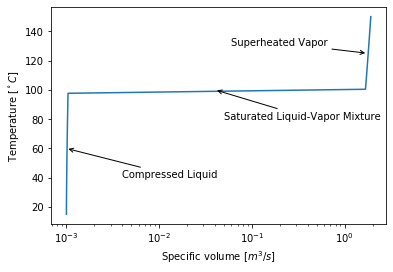

In [7]:
T_array = np.linspace(15,150) + 273.15    # temperature range: 15-150 deg. C, converted to K
v_array = np.zeros_like(T_array)          # create an array of 0s to store the specific volumes at each temperature

for i in range(T_array.size):
    w.TP = T_array[i], P_atm     # set the temperature and pressure
    v_array[i] = w.v             # get the specific volume at this temperature and pressure

plt.semilogx(v_array,T_array-273.15)
plt.ylabel('Temperature [$^\circ C$]')
plt.xlabel('Specific volume [$m^3/s$]')
plt.annotate('Compressed Liquid',(1e-3,60),(4e-3,40),arrowprops=dict(arrowstyle='->'))
plt.annotate('Saturated Liquid-Vapor Mixture',(4e-2,100),(5e-2,80),arrowprops=dict(arrowstyle='->'))
plt.annotate('Superheated Vapor',(1.75e0,125),(6e-2,130),arrowprops=dict(arrowstyle='->'));

The "stepped" shape of this plot indicates two things:
* The specific volume of water is relatively constant below $T = 100 ^\circ C$ (when it is a liquid), and increases linearly with temperature above $T = 100 ^\circ C$ (when it is a gas)
* A huge jump in specific volume occurs during the phase change around $T = 100 ^\circ C$

The labels in the diagram indicate the different phases that occur during the boiling process.  First, the water starts as a pure liquid known as a **compressed liquid**.  The word "compressed" indicates that the volume of the liquid is slightly less than its volume when boiling starts, although this is hard to see in the plot.

After boiling, the vapor expands as its temperature increases.  In this state, the water is known as a **superheated vapor**, indicating that it has been heated beyond complete evaporation.

Let's see what happens when we perform this experiment at a different pressure.  At the top of [Pikes Peak](https://en.wikipedia.org/wiki/Pikes_Peak), the atmospheric pressure is about 60% its value at sea level.

In the following example, we create a 2-D numpy array, where each column is a different pressure, and each row is a different temperature.  (The function [matplotlib.pyplot.plot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html) treats each column as a separate line to draw, which is why we are setting up our 2-D data array this way.)

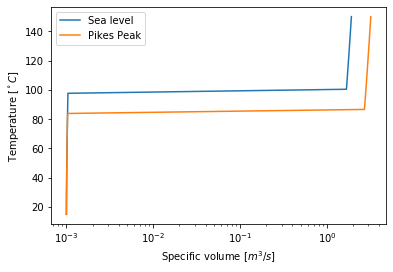

In [8]:
P_array = np.array([P_atm, 0.6*P_atm])            # array of two pressures [Pa]
T_array = np.linspace(15,150) + 273.15            # temperature range: 15-150 deg. C, converted to K
v_array = np.zeros((T_array.size,P_array.size))   # create an array of 0s to store the specific volumes at each temperature

for i in range(T_array.size):
    for j in range(P_array.size):
        w.TP = T_array[i], P_array[j]
        v_array[i,j] = w.v

plt.semilogx(v_array,T_array-273.15)
plt.ylabel('Temperature [$^\circ C$]')
plt.xlabel('Specific volume [$m^3/s$]')
plt.legend(['Sea level','Pikes Peak']);

Some observations about this plot:
* The boiling temperature of water at the top of Pikes Peak is about $85 ^\circ C$; this is why it takes much longer to cook food in boiling water at high altitudes!
* Once the water changes into a gas, its specific volume is much larger at the lower pressure.  If you inflate a balloon, then take it to the top of a mountain, you may be in for a bang!

<a id='sat'></a>

### Saturated liquid-vapor mixtures

When a substance, like water, is in the process of boiling or vaporizing, there is a mixture of liquid and vapor occuring simultaneously.  When the boiling starts, the water is 100% liquid, and when it ends, it is 100% vapor.  However, during the process, there is a definable quantity of both.

This property is called the **quality** $x$ of the liquid-vapor mixture.  It is defined by

$x = \dfrac{m_{vapor}}{m_{total}}$

In words, it is the mass fraction of vapor to the total mass (vapor+liquid).  By this defintion $x=0$ when the substance is purely liquid (known as a saturated liquid), and $x=1$ when it is purely vapor (known as a saturated vapor), and $0<x<1$ when there is some of both.  Note that these terms saturated liquid and vapor only apply right at the onset or conclusion of boiling.

Let's re-plot the boiling curve at sea level, and add points at the beginning, middle, and end of boiling using the quality $x$.  Do find these points, we will use the function `w.PX`, which sets the pressure and quality.

The temperature at which the phase change occurs is called the **saturation temperature**.  Note that it is a function of pressure: we saw previously that the saturation temperature is lower at the top of Pikes Peak, where the pressure is lower too.  To find the saturation temperature, we use the function `w.T_sat`.

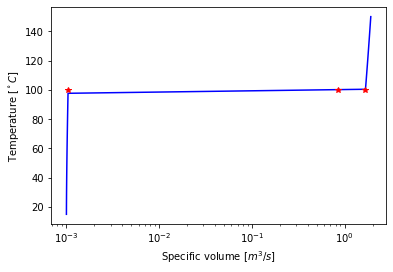

In [9]:
w.TP = T_atm, P_atm   # first, set the pressure back to sea level (the temperature is irrelevant)
Tsat = w.T_sat        # saturation temperature at this pressure [K]

w.PX = P_atm, 0    # set the quality x = 0 to find the point when boiling starts (at sea level)
vf = w.v           # the saturated liquid specific volume

w.PX = P_atm, 0.5  # set the quality x = 0.5 to find the point when boiling is halfway done
vhalf = w.v        # specific volume of the liquid-vapor mixture

w.PX = P_atm, 1    # set the quality x = 1 to find the point when boiling ends
vg = w.v           # the saturated vapor specific volume

T_array = np.linspace(15,150) + 273.15    # temperature range: 15-150 deg. C, converted to K
v_array = np.zeros_like(T_array)          # create an array of 0s to store the specific volumes at each temperature

for i in range(T_array.size):
    w.TP = T_array[i], P_atm
    v_array[i] = w.v

plt.semilogx(v_array,T_array-273.15,'b',[vf, vhalf, vg],[Tsat-273.15, Tsat-273.15, Tsat-273.15],'r*')
plt.ylabel('Temperature [$^\circ C$]')
plt.xlabel('Specific volume [$m^3/s$]');

The star on the left represents the very onset of boiling at this pressure.  This is called a **saturated liquid** state.  Thermodynamic properties in this state are usually denoted with a subscript 'f' for fluid.  Hence, the specific volume at this state is denoted $v_f$.

The star on the right represents the completion of boiling at this pressure.  This is called a **saturated vapor** state.  Thermodynamic properties in this state are usually denoted with a subscript 'g' for gas.  Hence, the specific volume at this state is denoted $v_g$.

Note that the middle star does not occur halfway between the other two stars.  Remember that this middle star represents the point at which half the mass is liquid and half is vapor.  The overall density of the liquid+vapor at this point is closer to the density of the pure vapor because the liquid does not take up nearly as much volume, so overall the density is very low.  Hence, the specific volume, which is just the inverse of density, is close to its pure vapor value.

Let's repeat this process for several different pressures.  We've tried $p = p_{atm}$ (sea level) and $p = 0.6p_{atm}$ (Pikes Peak).  Let's also try $p = 20p_{atm}$, which is what you might find in a high pressure vessel.

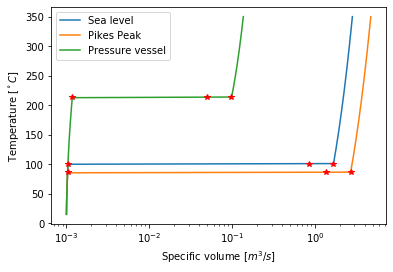

In [10]:
# first plot the constant pressure curves
P_array = np.array([P_atm, 0.6*P_atm, 20*P_atm])    # array of pressures [Pa]
T_array = np.linspace(15,350,301) + 273.15              # temperature range: 15-150 deg. C, converted to K
v_array = np.zeros((T_array.size,P_array.size))     # create an array of 0s to store the specific volumes at each temperature

for i in range(T_array.size):
    for j in range(P_array.size):
        w.TP = T_array[i], P_array[j]
        v_array[i,j] = w.v
        
plt.semilogx(v_array,T_array-273.15)
plt.ylabel('Temperature [$^\circ C$]')
plt.xlabel('Specific volume [$m^3/s$]')
plt.legend(['Sea level','Pikes Peak','Pressure vessel'])


# now compute the saturated liquid and vapor states at each pressure
for j in range(P_array.size):
    w.TP = T_atm, P_array[j]   # set the pressure (the temperature is irrelevant)
    Tsat = w.T_sat    # saturation temperature at this pressure [K]
    
    w.PX = P_array[j], 0       # set the quality x = 0 to find the point when boiling starts (at sea level)
    vf = w.v          # the saturated liquid specific volume

    w.PX = P_array[j], 0.5     # set the quality x = 0.5 to find the point when boiling is halfway done
    vhalf = w.v       # specific volume of the liquid-vapor mixture

    w.PX = P_array[j], 1       # set the quality x = 1 to find the point when boiling ends
    vg = w.v          # the saturated vapor specific volume

    plt.semilogx([vf, vhalf, vg],np.full((3,),Tsat)-273.15,'r*');
    

Notice that as pressure increases, the difference in specific volume between liquid and vapor decreases.  At some very high pressures, the difference between a liquid and a vapor vanishes!

Every substance has a point above which the difference between liquids and vapors vanishes; this point is called the **critical point**.  Using the functions `w.critical_temperature` and `w.critical_density`, we can find the critical temperature and specific volume of water.

In [11]:
Tcrit = w.critical_temperature    # critical temperature [K]
vcrit = 1/w.critical_density      # critical specific volume [m^3/kg]

print('Critical temperature =',Tcrit-273.15,'C')
print('Critical specific volume =',vcrit,'m^3/kg')

Critical temperature = 374.13599999999997 C
Critical specific volume = 0.0031545741324921135 m^3/kg


Let's also plot curves of the liquid and vapor saturation states in a temperature range from $15 ^\circ C$ up to the critical temperature.  (Remember that above the critical temperature, there is no phase change!)  These saturated liquid and vapor curves make up what's known as the **vapor dome**.

We'll define a new function for plotting this vapor dome, since we're going to be making these plots many times.

In [12]:
def Tv_vapor_dome():
    
    w = ct.Water()
    
    # critical temperature and specific volume
    Tcrit = w.critical_temperature    # critical temperature [K]
    vcrit = 1/w.critical_density      # critical specific volume [m^3/kg]

    # set up arrays for plotting saturated curves
    T_array = np.linspace(15+273.15,0.9999*Tcrit)   # the temperature range must stop just before the critical point
    vf_array = np.zeros_like(T_array)
    vg_array = np.zeros_like(T_array)

    # get saturated states for plotting
    for i in range(T_array.size):
        w.TX = T_array[i], 0        # saturated liquid (x = 0)
        vf_array[i] = w.v
    
        w.TX = T_array[i], 1        # saturated vapor (x = 1)
        vg_array[i] = w.v

    # plot saturated curves and critical point
    plt.semilogx(vf_array,T_array-273.15,'g',vg_array,T_array-273.15,'g',vcrit,Tcrit-273.15,'r*')
    plt.ylabel('Temperature [$^\circ C$]')
    plt.xlabel('Specific volume [$m^3/kg$]')

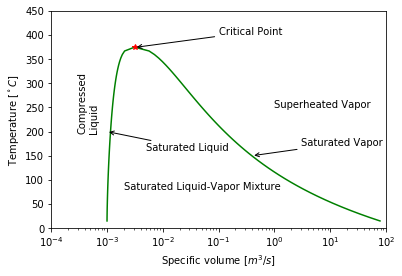

In [13]:
Tv_vapor_dome()
plt.text(3e-4,200,'Compressed\nLiquid',rotation=90)
plt.text(2e-3,80,'Saturated Liquid-Vapor Mixture')
plt.text(1e0,250,'Superheated Vapor')
plt.annotate('Saturated Liquid',(1e-3,200),(5e-3,160),arrowprops=dict(arrowstyle='->'))
plt.annotate('Saturated Vapor',(4e-1,150),(3e0,170),arrowprops=dict(arrowstyle='->'))
plt.annotate('Critical Point',(vcrit,Tcrit-273.15),(1e-1,400),arrowprops=dict(arrowstyle='->'))
plt.xlim((1e-4,1e2))
plt.ylim((0,450));

<a id='plotprocess'></a>

### Plotting a Thermodynamic Process on a Property Diagram

Let's look at some examples of thermodynamic processes (converting a substance from one state to another), and how we can plot the path of a process on a T-v diagram.

**Example:** Water is stored inside a rigid tank with an initial temperature $T_1 = 500 ^\circ C$ and pressure $P_1 = 2.0 MPa$.  The water is cooled until $T_2 = 150 ^\circ C$.  Find the final pressure $P_2$ and plot this process on a T-v diagram.

<img src="../images/ex water cooling.png" width="200">

Because the process takes place in a rigid tank, the mass and volume of water remain constant throughout the process.  Therefore, the specific volume remains constant too.  We can write this as $v_1 = v_2$.  Let's summarize:

**State 1:**  ***Known:*** $T_1,P_1$, ***Unknown:*** $v_1$

**State 2:**  ***Known:*** $T_2,v_2$ (once we find $v_1$), ***Unknown:*** $P_2$

Let's write some code to find $P_2$!

In [14]:
# state 1
T1 = 500 + 273.15      # temperature [K]
P1 = 2.0e6             # pressure [Pa]
state1 = ct.Water()    # create water object
state1.TP = T1, P1     # set temperature and pressure
v1 = state1.v          # specific volume [m^3/kg]

# state 2
v2 = v1                # specific volume [m^3/kg]
T2 = 150 + 273.15      # temperature [K]
state2 = ct.Water()    # create water object
state2.TV = T2, v2     # set temperature and specific volume
P2 = state2.P          # pressure [Pa]

print('State 2 pressure =',P2,'Pa')

State 2 pressure = 475392.13234379754 Pa


Note that we had to find $v_1$ before we could determine state 2 because we were only given one parameter at state 2, $T_2$!

Now, let's define a function to plot this process on a T-v diagram.  The following code block is our first attempt at such a function.  (We will make improvements to this function in later lessons!)  This function plots the following:

* Plots the critical point as a red star

* Plots the saturated liquid and vapor curves

* Finally, plots state 1 and state 2 of the process and connects them with a straight line

In [15]:
def Tv_diagram(*args):
    
    T_states = np.zeros(len(args),)  # array to store temperatures at each state
    v_states = np.zeros(len(args),)  # array to store specific volumes at each state
    
    for i in range(len(args)):       # loop through each state in the process
        T_states[i] = args[i].T
        v_states[i] = args[i].v
        plt.text(v_states[i],T_states[i]-273.15,'  '+str(i+1),fontsize=12)
    plt.semilogx(v_states,T_states-273.15,'bo-',linewidth=2)

Let's look at how this function works.  First, notice how the function is defined, `Tv_diagram(*args)`.  The `*args` command is used to input a variable number of arguments.  We want this function to work for a thermodynamic process with any number of steps, so this command lets us plan for any number of inputs.

We want to plot the thermodynamic process specific to this example.  We loop through all the states in the process, adding their temperatures and specific volumes to the arrays `T_states` and `v_states`.  Last, we plot these states as a blue line with circular markers and text labels.

We call our previous function for plotting the vapor dome, then our newly created function using the following commands:

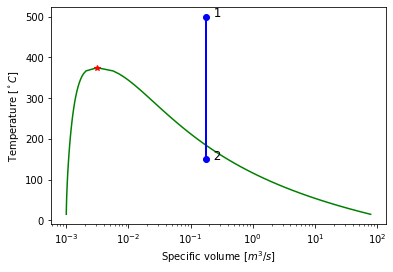

In [16]:
Tv_vapor_dome()
Tv_diagram(state1,state2)

This plot shows that the process starts in a superheated vapor state (state 1) and ends in a saturated liquid-vapor state (state 2).

#### Try it!

Suppose the water is cooled further until the pressure reaches $P_3 = 100 kPa$.  Find the temperature $T_3$ and plot this additional step on the T-v diagram.

State 3 temperature 99.65884381816676 C


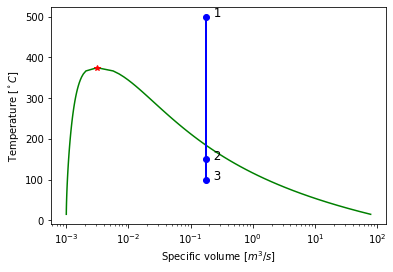

In [17]:
# state 3
state3 = ct.Water()
v3 = v2
P3 = 100e3
state3.PV = P3, v3
T3 = state3.T
print('State 3 temperature',T3-273.15,'C')

Tv_vapor_dome()
Tv_diagram(state1,state2,state3)

<a id='phasestate'></a>

### Determining Phase from Therodynamic State

From plots like the T-v diagram shown above, it is easy to determine the phase of the substance (in this case water) at the beginning and end of the process.  The way we do this is to look at where the points lie relative to the saturation curves.

To further help make phase distinctions, let's add some lines of contant pressure (called **isobars**) to the diagram.  Additionally, let's have them pass through the critical point, state 1, and state 2.

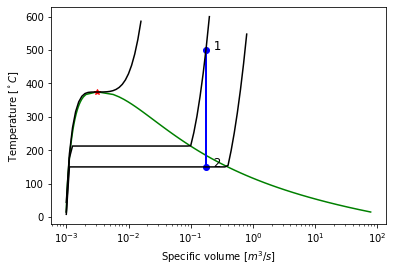

In [18]:
Tv_vapor_dome()
Tv_diagram(state1,state2)

# plot isobar through critical point
w = ct.Water()
Pcrit = w.critical_pressure    # critical pressure [Pa]
v_array = np.logspace(-3,2,101)
T_array = np.full_like(v_array,np.nan)
for i in range(v_array.size):
    w.PV = Pcrit, v_array[i]
    if w.T > 600 + 273.15:
        break
    T_array[i] = w.T
plt.semilogx(v_array,T_array-273.15,'k')

# plot isobar through state 1
T_array = np.full_like(v_array,np.nan)
for i in range(v_array.size):
    w.PV = state1.P, v_array[i]
    if w.T > 600 + 273.15:
        break
    T_array[i] = w.T
plt.semilogx(v_array,T_array-273.15,'k')

# plot isobar through state 2
T_array = np.full_like(v_array,np.nan)
for i in range(v_array.size):
    w.PV = state2.P, v_array[i]
    if w.T > 600 + 273.15:
        break
    T_array[i] = w.T
plt.semilogx(v_array,T_array-273.15,'k');

Now, we can clearly see that state 1 is at a temperature above the critical temperature, and at a pressure lower than the critical pressure.  Thus, it is a *superheated vapor*.  Let's verify these assertions:

In [19]:
print('Critical temperature =',w.critical_temperature-273.15,'C')
print('T_1 =',state1.T-273.15,'C')
print('Critical pressure =',w.critical_pressure,'Pa')
print('P_1 =',state1.P,'Pa')

Critical temperature = 374.13599999999997 C
T_1 = 500.0 C
Critical pressure = 22089000.0 Pa
P_1 = 2000000.0003193528 Pa


Let's look at state 2.  From the plot we can see that it's a saturated fluid-vapor mixture.  How can we confirm this without a diagram?

Let's focus on the saturated liquid and vapor states at the same pressure as state 2.  The following code replots the vapor dome, state 2, and the saturated fluid and vapor states at the same pressure as state 2:

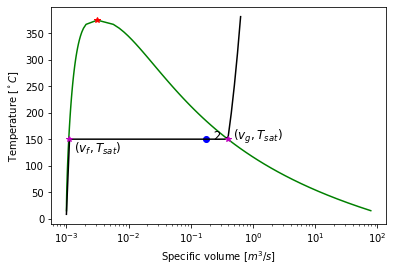

In [20]:
Tv_vapor_dome()

# plot state 2
plt.semilogx(state2.v,state2.T-273.15,'bo')
plt.text(state2.v,state2.T-273.15,'  2',fontsize=12)

# plot isobar through state 2
w = ct.Water()
v_array = np.logspace(-3,2,101)
T_array = np.full_like(v_array,np.nan)
for i in range(v_array.size):
    w.PV = state2.P, v_array[i]
    if w.T > 400 + 273.15:
        break
    T_array[i] = w.T
plt.semilogx(v_array,T_array-273.15,'k')

# plot saturated liquid state at P_2
w.PX = state2.P, 0
plt.semilogx(w.v,w.T-273.15,'m*')
plt.text(1.2*w.v,w.T-273.15-25,'$(v_f,T_{sat})$',fontsize=12)

# plot saturated vapor state at P_2
w.PX = state2.P, 1
plt.semilogx(w.v,w.T-273.15,'m*')
plt.text(1.2*w.v,w.T-273.15,'$(v_g,T_{sat})$',fontsize=12);

Now, let's show definitively that state 2 is a saturated fluid-vapor mixture.  To do this, we show that the specific volume at state 2 is between the specific volumes of a pure saturated fluid and a pure saturated vapor, in other words

$v_f < v_2 < v_g$

In [21]:
w.PX = state2.P, 0
print('v_f =',w.v,'m^3/kg')
print('v_2 =',state2.v,'m^3/kg')
w.PX = state2.P, 1
print('v_g =',w.v,'m^3/kg')

v_f = 0.001090488669291146 m^3/kg
v_2 = 0.17567602672056637 m^3/kg
v_g = 0.3931786253702526 m^3/kg


Since $v_f < v_2 < v_g$, we conclude that state 2 must be a mixure of the saturated fluid and the saturated vapor.

#### Try it!

Determine the phase of each of the following water states:

a. $T = 25 ^\circ C$ and $v = 0.001001 m^3/kg$

b. $P = 1 MPa$ and $v = 0.32 m^3/kg$

c. $T = 50 ^\circ C$ and $v = 10 m^3/kg$

In [22]:
w = ct.Water()

# part a
T = 25 + 273.15
w.TX = T, 0
print('v_f =',w.v,'m^3/kg')
w.TX = T, 1
print('v_g =',w.v,'m^3/kg')

v_f = 0.0010029317234519772 m^3/kg
v_g = 43.45369430937588 m^3/kg


Since $v < v_f$, we conclude that the water is a compressed liquid.

In [23]:
# part b
P = 1e6
w.PX = P, 0
print('v_f =',w.v,'m^3/kg')
w.PX = P, 1
print('v_g =',w.v,'m^3/kg')

v_f = 0.001127326401112596 m^3/kg
v_g = 0.19446853746357606 m^3/kg


Since $v > v_g$, we conclude that the water is a superheated vapor.

In [24]:
# part c
T = 50 + 273.15
w.TX = T, 0
print('v_f =',w.v,'m^3/kg')
w.TX = T, 1
print('v_g =',w.v,'m^3/kg')

v_f = 0.0010121430761650548 m^3/kg
v_g = 12.05787967509177 m^3/kg


Since $v_f < v < v_g$, we conclude that the water is a liquid-vapor mixture.

Furthermore, we can compute the quality using the formula

$x = \dfrac{v-v_f}{v_g-v_f}$

In [25]:
v = 10
w.TX = T, 0
vf = w.v
w.TX = T, 1
vg = w.v
x = (v-vf)/(vg-vf)
print('Quality =',x)

Quality = 0.8293188782552922
